In [1]:
#Q7 Decision tree classifier
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split into training and test sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train and evaluate Decision Trees with different depths
for depth in [1, 2, 3]:
    # Initialize classifier with specified max_depth
    clf = DecisionTreeClassifier(max_depth=depth, random_state=42)
    clf.fit(X_train, y_train)  # Train the model

    # Predict and calculate accuracy
    train_acc = accuracy_score(y_train, clf.predict(X_train))
    test_acc = accuracy_score(y_test, clf.predict(X_test))

    # Print results
    print(f"Depth={depth}: Train Accuracy={train_acc:.2f}, Test Accuracy={test_acc:.2f}")


Depth=1: Train Accuracy=0.65, Test Accuracy=0.71
Depth=2: Train Accuracy=0.94, Test Accuracy=0.98
Depth=3: Train Accuracy=0.95, Test Accuracy=1.00


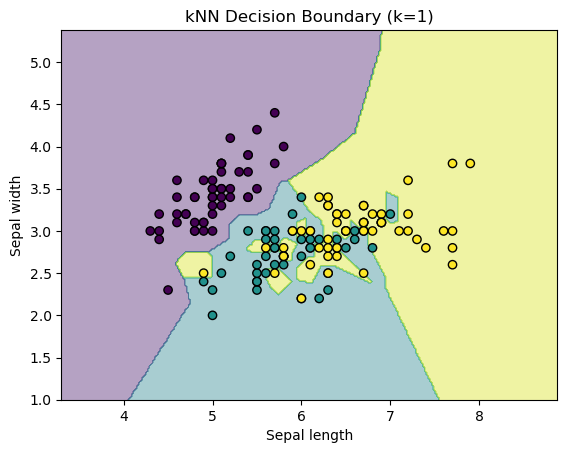

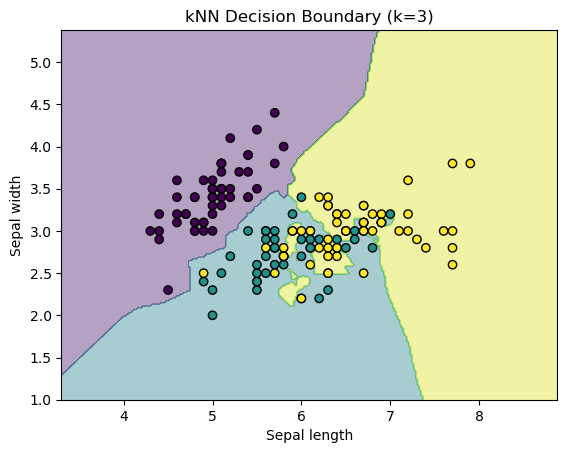

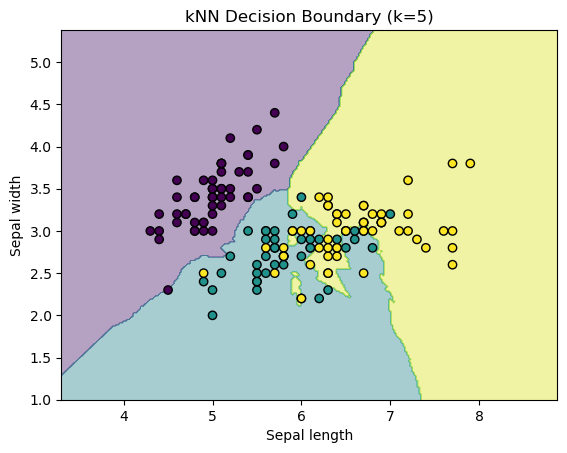

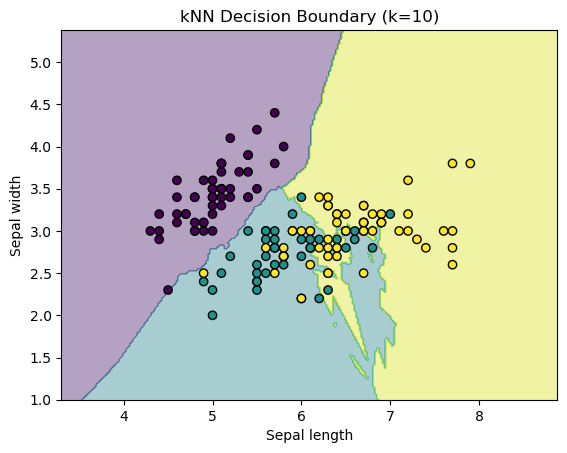

In [5]:
#Q8 kNN Classification with Decision Boundaries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# Use only the first two features: sepal length and sepal width
X = iris.data[:, :2]
y = iris.target

# Create a mesh grid step size for plotting
h = 0.02

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Function to plot decision boundaries for a given k
def plot_knn(k):
    # Train kNN classifier
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X_train, y_train)

    # Define plot boundaries
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Predict over the grid
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot decision boundary and data points
    plt.figure()
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k')
    plt.title(f"kNN Decision Boundary (k={k})")
    plt.xlabel("Sepal length")
    plt.ylabel("Sepal width")
    plt.show()

# Plot for different values of k
for k in [1, 3, 5, 10]:
    plot_knn(k)


In [7]:
#Q9 Performance Evaluation of kNN (k=5)
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

# Use all features and binarize labels for ROC/AUC
X = iris.data
y = iris.target
y_bin = label_binarize(y, classes=[0, 1, 2])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y_bin, test_size=0.3, random_state=42)

# Train kNN classifier with One-vs-Rest strategy
knn = OneVsRestClassifier(KNeighborsClassifier(n_neighbors=5))
knn.fit(X_train, y_train)

# Predict on test set
y_pred = knn.predict(X_test)

# Convert one-hot predictions back to class labels
y_test_labels = np.argmax(y_test, axis=1)
y_pred_labels = np.argmax(y_pred, axis=1)

# Print confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test_labels, y_pred_labels))

# Print classification metrics
print("\nClassification Report:\n", classification_report(y_test_labels, y_pred_labels))

# Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
    roc_auc

Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

